In [21]:
%matplotlib inline

In [1]:
%matplotlib notebook
from pymnet import *

In [78]:
g =MultilayerNetwork(aspects=1)

In [3]:
import pandas as pd

In [79]:
#g.add_layer('friends')
g.add_layer('popular')
g.add_layer('nonpopular')

In [5]:

data = pd.read_csv('D:\\yelpProcessedData.csv', sep=',', header=0)

In [76]:
data.iloc[-2]

source    Keh7Bo4nuHBpH9FICoBLHQ
target    QKvIXRzpdnACf4WomKIkww
layer                 nonPopular
Name: 101974, dtype: object

In [80]:
for n1, n2, layer in data.values:
    #layer_name = {1:'UG', 2:'OG', 3:'DLR'}[layer]
    
    g[n1, layer][n2, layer] = g[n1, layer][n2, layer] + 1

In [84]:
len(list(g))

1340

In [50]:
for node in list(g):
    g[node,'popular'][node,'nonpopular']=1

In [51]:
g2 = nx.Graph(aggregate(g, aspects = 1))

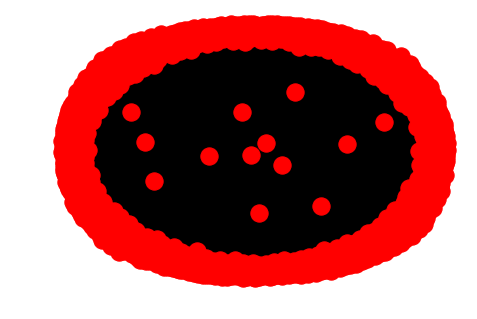

In [52]:
nx.draw(g2)

In [15]:
ec = nx.eigenvector_centrality(g2)

In [16]:
sorted(list(ec.items()), key=lambda x:x[1], reverse = False)[:20]

[('p5RpSfO3pAVsHxuVn4rYBA', 1.3569133547667708e-141),
 ('mhxhUGO_-zSGQREUgtKtEg', 1.3569133547667708e-141),
 ('dwClwkBwnZYcF2ds0azUig', 1.3569133547667708e-141),
 ('I63G0cyyZjZEYJgEqhtycg', 1.3569133547667708e-141),
 ('D3LteKL0cHczjNMkkDmFTg', 4.915628619762281e-128),
 ('0Rry9ZZBF0ixUqrKJXqEzQ', 4.915628619762281e-128),
 ('gjoN4q-f61kwjmmU4mm1_g', 4.915628619762281e-128),
 ('raUFRqTBZ0umzgfHOV6IXA', 4.915628619762281e-128),
 ('vRJUVOSOOY4VeQkfiV6nIw', 4.915628619762281e-128),
 ('zI9S0s8A6-Xb9hZHyP8oIQ', 4.915628619762281e-128),
 ('dWu61bxjG3vrlhAd8LDa1g', 1.780762540404012e-114),
 ('vhjcMJsqS2zDQ6iPm6MEOw', 1.780762540404012e-114),
 ('C_Es6AdX0K5arWCyRJy_ag', 1.780762540404012e-114),
 ('5yP1xFFOEpfJPFqHfY7b_g', 1.780762540404012e-114),
 ('7YgNuFeNfYKA52QpLyQAHg', 1.780762540404012e-114),
 ('HXRScGn_h93AEGD14swuew', 1.780762540404012e-114),
 ('gEA3i1RsU9BDED7QVaWYaQ', 1.780762540404012e-114),
 ('tHMx7OxcPd7Tu4U3Z50oFw', 1.780762540404012e-114),
 ('ODZxY8BgOKkwJropDUqzBw', 1.780762540404

In [25]:
S, nds = supra_adjacency_matrix(g)

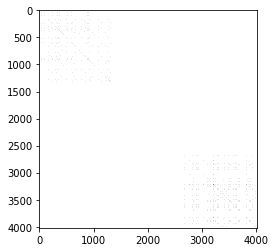

In [26]:
from matplotlib import pyplot as plt
plt.imshow(S, cmap = plt.cm.binary)

In [27]:
g3 = nx.from_numpy_matrix(S)

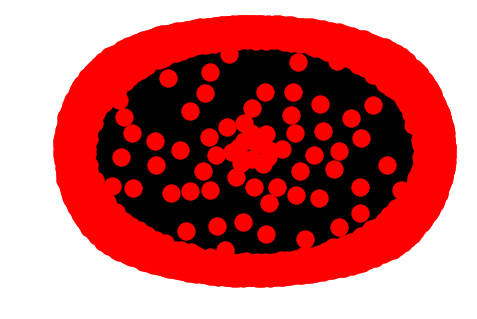

In [28]:
nx.draw(g3)


In [104]:
ec = nx.degree_centrality(g3)

In [105]:
top_ranked = sorted(list(ec.items()), key=lambda x:x[1], reverse = True)[:50]
[nds[x[0]] for x in top_ranked]    

[('cMEtAiW60I5wE_vLfTxoJQ', 'popular'),
 ('d_TBs6J3twMy9GChqUEXkg', 'popular'),
 ('5HmK6riLkciM0Xxo1ycNTg', 'popular'),
 ('PxzBS6FXePo9p__FRVLMSg', 'popular'),
 ('YpGt3hdq5adPlEFn9fQ2Zw', 'popular'),
 ('4RASyCC4LyP6ygP2Dts5FA', 'popular'),
 ('fQH_rE23qWixF0uvTl3Vcw', 'popular'),
 ('XTXVPAkymeR9dkBiuQjKig', 'popular'),
 ('q6I9JJfy162rFtGD2DkZ2w', 'popular'),
 ('ZUoL4srnWYglcbzUjMPi7Q', 'popular'),
 ('-A-HDHnYnDziVYXkdINuLw', 'popular'),
 ('-DeGpiQgLOEb5rajcz8E6w', 'popular'),
 ('-Lj7J-aHJoujTNoIqxrxAQ', 'popular'),
 ('-xzvt0ZzKndd8jR380nxzA', 'popular'),
 ('09A3j44-l3Y1u87_mU-msQ', 'popular'),
 ('09lW2T_2DESlolLyksf7PQ', 'popular'),
 ('17knTMZmrOwCmFU6EQRHMA', 'popular'),
 ('18qEoFOVEernpVLh97PQPQ', 'popular'),
 ('1XIqrQhS7nfbAQGIlFFV3A', 'popular'),
 ('1fLNpDVlhAZdCpQKCfW_cg', 'popular'),
 ('2SW0GXcPc2eTfykYfZNeBQ', 'popular'),
 ('4ECIXWllFTxtJaj1cKOZWw', 'popular'),
 ('4OuY8zCZ6LoiQNpMtE802A', 'popular'),
 ('4RR0iMHXHTBlpUiIE4gY5A', 'popular'),
 ('4VmuXuSRhv5UxYUy3tMpiQ', 'popular'),


In [106]:
s = top_ranked[0][0]
e = top_ranked[10][0]

In [107]:
path = nx.shortest_path(g3, s, e)

In [108]:
[nds[x] for x in path]

[('cMEtAiW60I5wE_vLfTxoJQ', 'popular'), ('-A-HDHnYnDziVYXkdINuLw', 'popular')]

In [59]:
len(list(g))

2978

In [56]:
list(g.edges)

[(8.91e+17, 3036134013, 'followers', 'followers', 1),
 (8.91e+17, 3206906835, 'followers', 'followers', 1),
 (8.91e+17, 1039046299, 'followers', 'followers', 1),
 (8.91e+17, 1120609025052350000, 'followers', 'followers', 1),
 (8.91e+17, 3283525548, 'followers', 'followers', 1),
 (8.91e+17, 755469207312228000, 'followers', 'followers', 1),
 (8.91e+17, 281201274, 'followers', 'followers', 1),
 (8.91e+17, 3368822652, 'followers', 'followers', 1),
 (1.07e+18, 3036134013, 'followers', 'followers', 1),
 (1.07e+18, 941232617671876000, 'followers', 'followers', 1),
 (1.07e+18, 1082162906676880000, 'followers', 'followers', 1),
 (1.07e+18, 1039759933728640000, 'followers', 'followers', 1),
 (1.07e+18, 1053114163982000000, 'followers', 'followers', 1),
 (1.07e+18, 991328593266520000, 'followers', 'followers', 1),
 (1.07e+18, 1074587086978630000, 'followers', 'followers', 1),
 (1.07e+18, 940262825729183000, 'followers', 'followers', 1),
 (1.07e+18, 2322625460, 'followers', 'followers', 1),
 (1.07

In [73]:
list(g[3, 'UG'])

[(224, 'UG'), (258, 'UG'), (3, 'DLR'), (3, 'OG')]

In [74]:
g[3,'UG'].deg()

4

In [96]:
from pylab import *

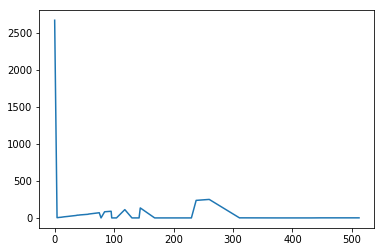

In [102]:
degree=dict(sorted(degs(g).items(),key=lambda x:x[0]))
plot(degree.keys(),degree.values())

In [93]:
density(g)

0.012133163493307288

In [36]:
multiplex_density(g)

AssertionError: 